# Week5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## a) Import the dataset. 

In [2]:
df=pd.read_csv("PlayTennis.csv")
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


## b) Initiate the implementation by performing data pre-processing steps.. Detail the steps involved in cleaning, handling missing values, and encoding categorical variables. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [4]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play Tennis    0
dtype: int64

In [5]:
df.describe()

,Outlook,Temperature,Humidity,Wind,Play Tennis
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
features=df.iloc[:,:-1]
def label(df):
    le=LabelEncoder()
    for column in df.columns:
        df[column]=le.fit_transform(df[column])
    return df
features=label(features)
features

C:\Users\mca\AppData\Local\Temp\ipykernel_17848\2590391308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=le.fit_transform(df[column])


,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [8]:
y=df["Play Tennis"]
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Tennis, dtype: object

## c) Develop a Python function or script to fit a Decision Tree algorithm to the training set. Specify the key hyperparameters and configurations involved in training the Decision Tree model. 

In [9]:
X_train,X_test,y_train,y_test=train_test_split(features,y,test_size=0.2)

In [10]:
X_train

,Outlook,Temperature,Humidity,Wind
4,1,0,1,1
9,1,2,1,1
10,2,2,1,0
5,1,0,1,0
13,1,2,0,0
3,1,2,0,1
8,2,0,1,1
0,2,1,0,1
7,2,2,0,1
11,0,2,0,0


In [11]:
X_test

,Outlook,Temperature,Humidity,Wind
6,0,0,1,0
2,0,1,0,1
1,2,1,0,0


In [12]:
y_train

4     Yes
9     Yes
10    Yes
5      No
13     No
3     Yes
8     Yes
0      No
7      No
11    Yes
12    Yes
Name: Play Tennis, dtype: object

In [13]:
y_test

6    Yes
2    Yes
1     No
Name: Play Tennis, dtype: object

In [14]:
Classifier=DecisionTreeClassifier(criterion="entropy")#to do based on entropy

In [15]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

# d) Implement code to predict the test results using the trained Decision Tree model

In [16]:
y_pred=Classifier.predict(X_test)
y_pred

array(['No', 'Yes', 'No'], dtype=object)

# e) Evaluate the accuracy of the decision tree model on the test set. Generate a confusion matrix to analyze the model's performance. 

In [17]:
Classifier.score(X_test,y_test)

0.6666666666666666

In [18]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [19]:
Classifier.feature_importances_

array([0.27443575, 0.19226585, 0.15836706, 0.37493134])

In [20]:
Classifier.tree_.max_depth

4

In [21]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

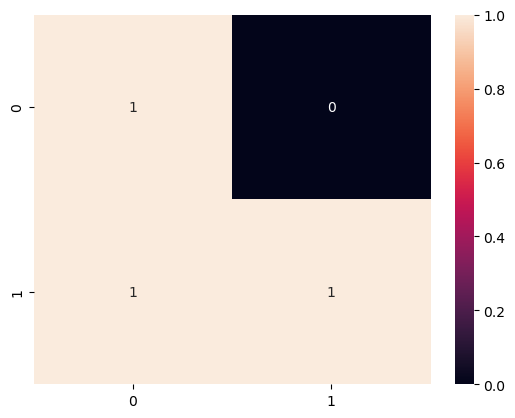

In [22]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

# f) Create visualizations to represent the results of the Decision Tree model on the test set. Create visualizations to represent the results of the Decision Tree model on the test set. 

In [25]:
text_representation = tree.export_text(Classifier)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: Yes
|   |   |--- feature_0 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: Yes
|   |--- feature_0 >  1.50
|   |   |--- class: No
|--- feature_2 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_1 <= 1.00
|   |   |   |--- class: No
|   |   |--- feature_1 >  1.00
|   |   |   |--- class: Yes
|   |--- feature_3 >  0.50
|   |   |--- class: Yes



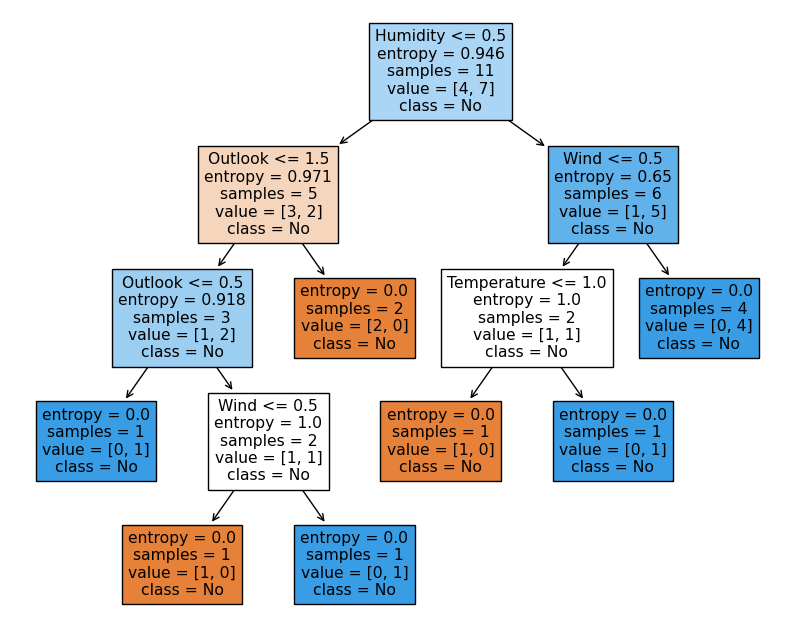

In [24]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(Classifier,feature_names=features.columns,  
                   class_names=df["Play Tennis"],
                   filled=True)
plt.show()

In [26]:
with open('DT1.txt',"w") as f:
    f=tree.export_graphviz(Classifier,out_file=f)